### **PROJECT TITLE: SPAM DETECTION (MACHINE LEARNING) : MULTINOMIAL NAIVE BAYES ALGORITHM**

---






**[1] SPAM DETECTION USING MULTINOMIAL NAIVE BAYES ALGORITHM**

---



In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(len(df_sms))

5572


In [5]:
df_sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

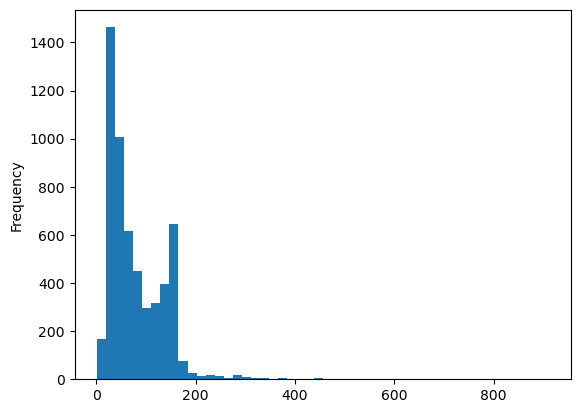

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

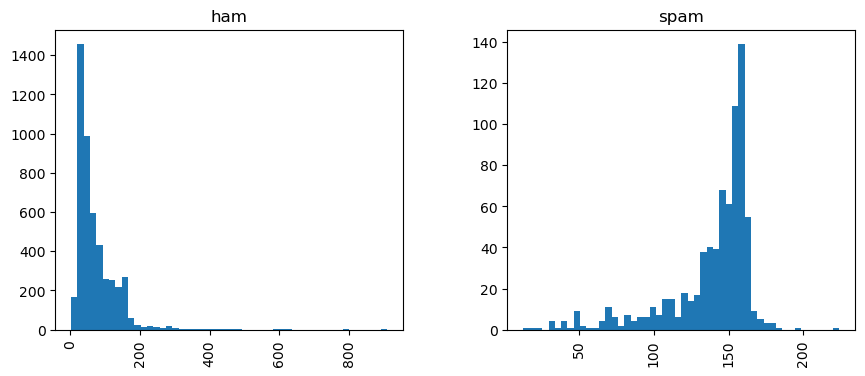

In [9]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [10]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], df_sms['label'].astype(int), test_size=0.20, random_state=1)



In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)


In [13]:

y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [14]:
predictions = naive_bayes.predict(testing_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447654


In [16]:
# Function to predict whether a new message is spam or not with accuracy
def predict_message(message):
    processed_message = count_vector.transform([message])
    prediction = naive_bayes.predict(processed_message)
    prediction_proba = naive_bayes.predict_proba(processed_message)

    if prediction[0] == 1:
        print(f"The message is spam with a probability of {prediction_proba[0][1]*100:.2f}%")
    else:
        print(f"The message is not spam with a probability of {prediction_proba[0][0]*100:.2f}%")

# User input for prediction
user_input = input("Type message to check whether the message entered is a spam or ham:\n")
predict_message(user_input)


The message is spam with a probability of 100.00%
